In [1]:
import pandas as pd
import numpy as np

In [2]:
# Ref: https://www.kaggle.com/datasets/harshal19t/lastfm-dataset?resource=download
df = pd.read_csv('Last.fm_data.csv', index_col= 0)
df.head()

,Username,Artist,Track,Album,Date,Time
0,Babs_05,Isobel Campbell,The Circus Is Leaving Town,Ballad of the Broken Seas,31 Jan 2021,23:36
1,Babs_05,Isobel Campbell,Dusty Wreath,Ballad of the Broken Seas,31 Jan 2021,23:32
2,Babs_05,Isobel Campbell,Honey Child What Can I Do?,Ballad of the Broken Seas,31 Jan 2021,23:28
3,Babs_05,Isobel Campbell,It's Hard To Kill A Bad Thing,Ballad of the Broken Seas,31 Jan 2021,23:25
4,Babs_05,Isobel Campbell,Saturday's Gone,Ballad of the Broken Seas,31 Jan 2021,23:21


In [3]:
dfp = df[['Username', 'Artist', 'Track']].groupby(['Username', 'Artist']).agg('count').reset_index()

In [4]:
dfp.head()

,Username,Artist,Track
0,Babs_05,"""Demons""",1
1,Babs_05,"""Weird Al"" Yankovic",7
2,Babs_05,#1 Garth Brooks Tribute Band,2
3,Babs_05,$uicideboy$,48
4,Babs_05,'Come From Away' Band,1


In [5]:
dfp.shape

(51790, 3)

In [6]:
# Optional: filter very rare interactions (recommended)
dfpf = dfp[dfp['Track'] >= 10]
dfpf.shape

(3639, 3)

In [7]:
# Split this data into train and test
# Hold out some data as test
train=dfpf.sample(frac=0.8,random_state=0)
test=dfpf.drop(train.index)

In [8]:
# ensure that all test users and products are in train 
test1 = test[test['Username'].isin(list(train['Username']))]
test2 = test1[test1['Artist'].isin(list(train['Artist']))]
print (len(test), len(test2))

728 482


In [9]:
train.reset_index(drop=True, inplace=True)
train.head()

,Username,Artist,Track
0,Babs_05,New Order,89
1,Orlenay,Junior Boys,14
2,eartle,The Jimi Hendrix Experience,15
3,Knapster01,Pettersson und Findus,14
4,massdosage,A Wilhelm Scream,20


In [10]:
test2.reset_index(drop=True, inplace=True)
test2.head()

,Username,Artist,Track
0,Babs_05,$uicideboy$,48
1,Babs_05,A Wilhelm Scream,20
2,Babs_05,Amalee,10
3,Babs_05,Amaranthe,27
4,Babs_05,Ashnikko,18


In [11]:
#train.to_csv('Lastfm-train.csv', index=False)
#test2.to_csv('Lastfm-test.csv', index=False)

# Analysis of dataset 

In [12]:
# Date Range
df.Date.min(), df.Date.max()

('01 Jan 2021', '31 Jan 2021')

In [13]:
# no of users, no of tracks
df.Username.nunique(), df.Track.nunique(), df.Artist.nunique(), df.Album.nunique()

(11, 67241, 22823, 38629)

In [14]:
len(df)

166153

In [15]:
set(list(df.Username))

{'Babs_05',
 'Knapster01',
 'Orlenay',
 'eartle',
 'franhale',
 'isaac',
 'jajo',
 'jonocole',
 'lobsterclaw',
 'massdosage',
 'mremond'}

In [16]:
df.Track.value_counts()

Track
Cascades (Dirt Road Version)    297
Rolling Ocean Waves             266
Immaterial                      123
Peur des filles                 104
迷失幻境 - DJ版                       99
                               ... 
Everyday, I Don't                 1
Un Bacio È Troppo Poco            1
Jan Girl I Love You               1
灰色の段階                             1
Just Melancholy                   1
Name: count, Length: 67241, dtype: int64

In [17]:
df.Artist.value_counts()

Artist
Sophie                              1181
Madlib                              1074
Bicep                                766
Taylor Swift                         649
Arlo Parks                           593
                                    ... 
Minizza                                1
Ricardo Villalobos; Robag Wruhme       1
Skatebård                              1
Justus Köhncke                         1
Uusi Fantasia                          1
Name: count, Length: 22823, dtype: int64

In [18]:
df.Album.value_counts()

Album
OIL OF EVERY PEARL'S UN-INSIDES           696
Sound Ancestors                           669
Isles                                     438
The HMV / Parlophone Singles 1988-1995    396
Collapsed in Sunbeams                     325
                                         ... 
Fendi (with Rakhim & Smokepurpp)            1
Body Pump (UNIIQU3 Remix)                   1
Wotless                                     1
SOULFUL VOCALS                              1
Northsiders                                 1
Name: count, Length: 38629, dtype: int64

In [19]:
# Album play count

In [20]:
import matplotlib.pyplot as plt

In [21]:
vals = df.Album.value_counts()

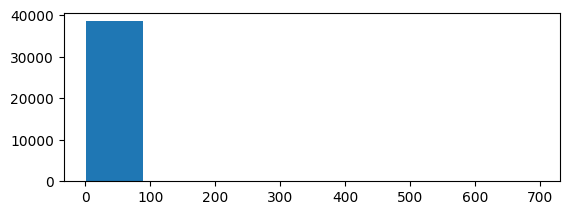

In [22]:
plt.subplot(211)
hist, bins, _ = plt.hist(vals, bins=8)

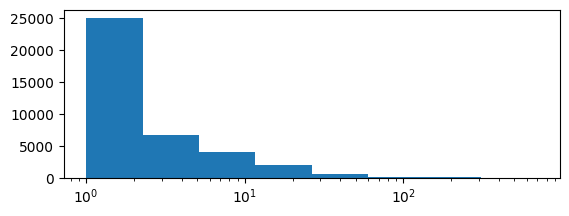

In [23]:
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))
plt.subplot(212)
plt.hist(vals, bins=logbins)
plt.xscale('log')
plt.show()

### Look at the most popular album 

In [24]:
dfal = df[df['Album'] == "OIL OF EVERY PEARL'S UN-INSIDES"]

In [25]:
dfal.Track.value_counts()

Track
Immaterial                       116
Faceshopping                      80
Is It Cold in the Water?          78
Infatuation                       78
It's Okay to Cry                  78
Not Okay                          77
Ponyboy                           71
Pretending                        64
Whole New World/Pretend World     54
Name: count, dtype: int64

### Look at the most popular artist

In [26]:
dfar = df[df['Artist'] == "Sophie"]
dfar['Album'].value_counts()

Album
OIL OF EVERY PEARL'S UN-INSIDES                         696
PRODUCT                                                  87
OIL OF EVERY PEARL'S UN-INSIDES Non-Stop Remix Album     82
Bipp                                                     44
Just Like We Never Said Goodbye                          44
UNISIL                                                   31
Vyzee                                                    28
Lemonade                                                 25
BIPP (Autechre Mx)                                       21
Nothing More to Say                                      20
Oil Of Every Pearl's Un - Insides                        16
Hard                                                     14
Elle                                                     13
Msmsmsm                                                  12
L.O.V.E.                                                  9
It's Okay To Cry                                          9
Unreleased                        

In [27]:
### Look at the most popular user
df['Username'].value_counts()

Username
Babs_05        33695
franhale       32712
Knapster01     27015
eartle         20966
massdosage     19015
jonocole       17230
Orlenay        10123
isaac           1780
mremond         1452
jajo            1102
lobsterclaw     1063
Name: count, dtype: int64